## Задание

Перевернуть изображение и дискретизировать его, а также заменить красные пиксели на желтые. Вывести оригинальное изображение и измененное.

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Загружаем изображение и делаем его копию
image = cv2.imread('image.jpg')
img = image.copy()

# Переворачиваем изображение
img = cv2.flip(img, -1)

# Размер шага дискретизации
K = 10

# Размер исходного изображения и его тональность
s = img.shape

# Высота и ширина изображения
h1, w1 = s[0], s[1]

# Новые размеры изображения
h = (s[0] - s[0] % K)
w = (s[1] - s[1] % K)

# Замена размера изображения на новые
img = cv2.resize(img, (w, h))

In [68]:
# Дискретизация изображения
for y in range(0, h-1, K):
    for x in range(0, w-1, K):
        # Проверка изображения: полутоновое или цветное
        if len(s) > 2:
            s = np.average(img[y:(y + K), x:(x + K)], axis=0)
            img[y:(y + K), x:(x + K)] = np.average(s, axis=0)
        else:
            s = img[y:(y+K), x:(x+K)]
            img[y:(y+K), x:(x+K)] = np.average(s)

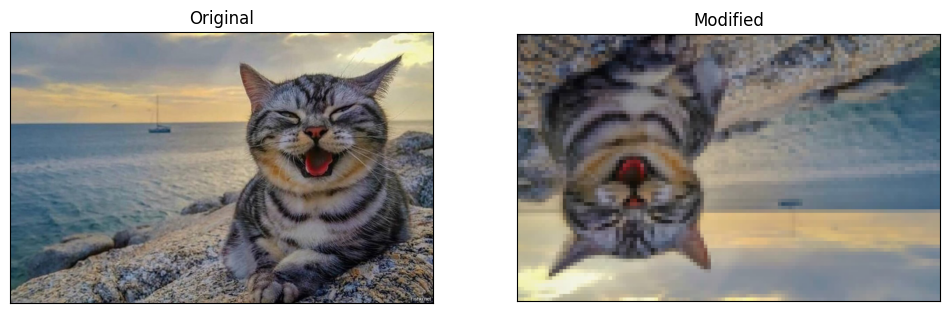

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Modified')
plt.xticks([])
plt.yticks([])
plt.show()

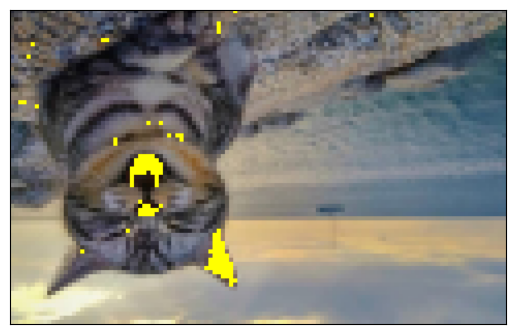

In [70]:
# Конвертируем изображение в цветовую модель BGR в RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Определяем нижнюю и верхнюю границы красного цвета в формате HSV
red_lower = np.array([0, 50, 50])
red_upper = np.array([10, 255, 255])
red_lower2 = np.array([170, 50, 50])
red_upper2 = np.array([180, 255, 255])

# Конвертируем изображение в цветовую модель HSV
hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Создаем маску для красного цвета
red_mask = cv2.inRange(hsv_image, red_lower, red_upper)
red_mask2 = cv2.inRange(hsv_image, red_lower2, red_upper2)
red_mask = cv2.bitwise_or(red_mask, red_mask2)

# Заменяем красные пиксели на желтые
yellow_color = (255, 255, 0)
img[red_mask > 0] = yellow_color

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

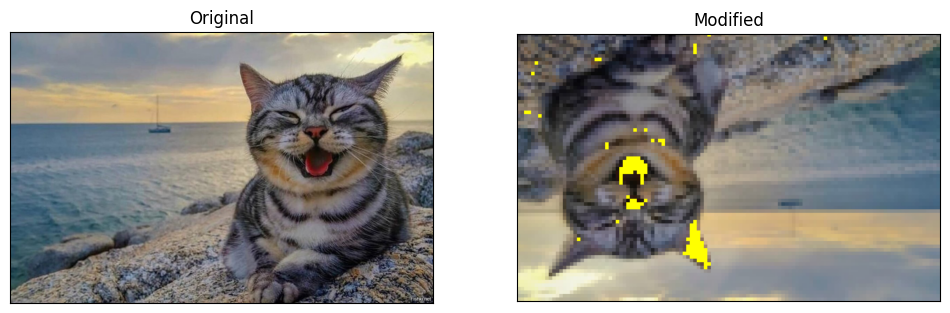

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(img)
plt.title('Modified')
plt.xticks([])
plt.yticks([])
plt.show()